# Created by : Jay Barode

Description:

In this project, We have to predict the percentage of an student based on the number of study hours. Here We're using Supervised Machine Learning model. 

In [64]:
#importing the required python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [3]:
#loading the data from csv file to pandas dataframe
st_data = pd.read_csv('http://bit.ly/w-data')


In [4]:
#print first 5 rows of the dataframe
st_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Number of rows and columns of data
st_data.shape

(25, 2)

In [8]:
#statistical discription of data
st_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


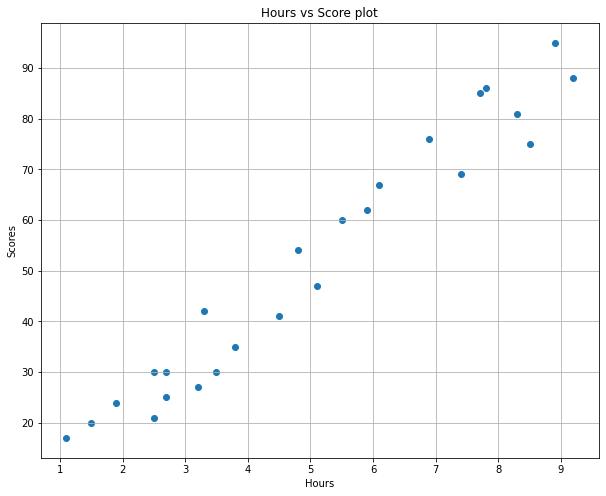

In [34]:
#Visual representation of data
plt.figure(figsize = (10,8))
plt.scatter(st_data.Hours,st_data.Scores)
plt.title('Hours vs Score plot')  
plt.grid()
plt.xlabel('Hours')  
plt.ylabel('Scores')
plt.show()

Here we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
Hence we'll use linear regression model.

In [18]:
#Separating feature and target columns
X = st_data.drop(columns='Scores',axis =1)
Y = st_data['Scores']

In [19]:
#Features
print(X)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [20]:
#Target
print(Y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


Splitting the dataset into training and testing data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=2) 

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(25, 1) (20, 1) (5, 1)


# Training the machine learning algorithm

In [26]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

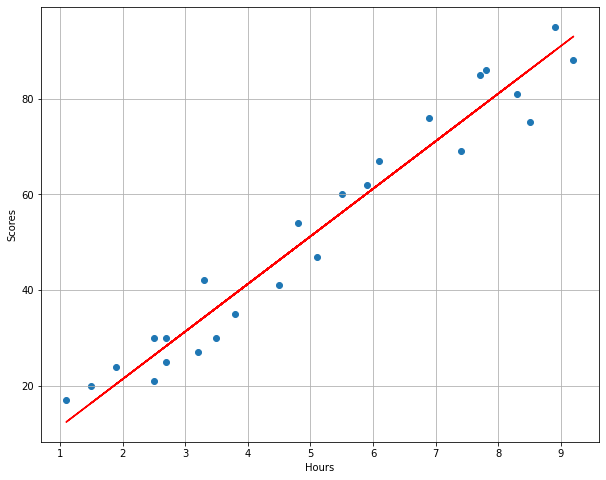

In [63]:
line = model.coef_*X + model.intercept_

#Plotting for the test data
plt.figure(figsize = (10,8))
plt.grid()
plt.scatter(X, Y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X, line,color = 'r')
plt.show()

In [41]:
#Accuracy on training data
training_data_accuracy = model.score(X_train, Y_train)*100
print('Training_data_accuracy: ',training_data_accuracy)

Training_data_accuracy:  94.23348138802984


In [43]:
#Accuracy on test data
test_data_accuracy = model.score(X_test, Y_test)*100
print('Test_data_accuracy: ',test_data_accuracy)

Test_data_accuracy:  97.35538080811827


# Making Predictions:

In [60]:
print(X_test) # Testing data 
Y_pred = model.predict(X_test)

    Hours
14    1.1
0     2.5
17    1.9
6     9.2
23    6.9


In [61]:
#Comoparing actual and predicted value
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
print(df)

    Actual  Predicted
14      17  12.442587
0       21  26.359448
17      24  20.395079
6       88  92.961570
23      76  70.098155


Our task is to predict the score of the student who studies 9.25 hours..
Therefore we'll use our trained machine learning model to predict score of the student.

In [58]:
predicted_score = model.predict([[9.25]])
print('The Predicted score of the Student who studies 9.25 hours is:', predicted_score[0])

The Predicted score of the Student who studies 9.25 hours is: 93.45860055685799


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Evaluating the model:

In [62]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.877039354964476
